Changelog: Please enter your name, the date, and a quick summary of any changes made

Ben Acuna : 30.4.2025 : Initial set-up and Dataset 1 Preprocessing

In [ ]:
#Data import and processing
import numpy as np
import pandas as pd

#not sure if we want to scale features at this point?
#from sklearn.preprocessing import StandardScaler

##Dataset 1: India xAgriculture Crop Production
df1 = pd.read_csv('India Agriculture Crop Production.csv')
df1 = df1.dropna()

X1 = df1.drop(['Yield', 'Production', 'Production Units', 'Area Units'], axis = 1)
Y1 = df1['Yield']

#One-Hot-Encoding Dataset 1
categorical_features1 = X1.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features1 = X1.select_dtypes(exclude=['object', 'category']).columns.tolist()

#need table with mean, sd, median, mean, min, max for each variable

#Dataset 2: 
df2 = pd.read_csv('usa.csv')
df2 = df2.dropna()

X2 = df2.drop(['Grain_yield_kg_ha', 'PCPN_mm_d', ], axis = 1)
Y2 = df2['Grain_yield_kg_ha']

#One-Hot-Encoding Dataset 2
categorical_features2 = X2.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features2 = X2.select_dtypes(exclude=['object', 'category']).columns.tolist()

def describe_features(df, feature_names):
    summary = df[feature_names].agg(['mean', 'median', 'std', 'max', 'min']).T
    summary = summary.rename(columns={
        'mean': 'Mean',
        'median': 'Median',
        'std': 'Standard Deviation',
        'max': 'Max',
        'min': 'Min'
    })
    return summary

# Describe Dataset 1
print("Dataset 1 Summary:")
summary_df1 = describe_features(X1, numerical_features1)
print(summary_df1)

# Describe Dataset 2
print("\nDataset 2 Summary:")
summary_df2 = describe_features(X2, numerical_features2)
print(summary_df2)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

In [38]:
#start with something simpler? Logistic regression

# Bin Yield into categories (based on quantiles or your own thresholds)
low_thresh = df1['Yield'].quantile(0.33)
high_thresh = df1['Yield'].quantile(0.66)

def categorize_yield(y):
    if y <= low_thresh:
        return 'Low'
    elif y <= high_thresh:
        return 'Medium'
    else:
        return 'High'

df1['Yield_Category'] = df1['Yield'].apply(categorize_yield)


# Assume 'Yield_Category' was already created
X1 = df1.drop(['Yield', 'Yield_Category', 'Production', 'Production Units', 'Area Units'], axis=1)
Y1 = df1['Yield_Category']

# Define categorical feature list again (if needed)
categorical_features1 = X1.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features1)
    ],
    remainder='passthrough'
)

# Full pipeline with Logistic Regression instead of Random Forest
pipeline1 = Pipeline(steps=[
    ('preprocessing', preprocessor1),
    ('classifier', LogisticRegression(max_iter=500))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# Train model
pipeline1.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.337233782129743


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

        High       0.34      1.00      0.50     34440
         Low       0.00      0.00      0.00     33941
      Medium       0.00      0.00      0.00     33744

    accuracy                           0.34    102125
   macro avg       0.11      0.33      0.17    102125
weighted avg       0.11      0.34      0.17    102125



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#start with something simpler? Logistic regression

# Bin Yield into categories (based on quantiles or your own thresholds)
low_thresh = df1['Yield'].quantile(0.33)
high_thresh = df1['Yield'].quantile(0.66)

def categorize_yield(y):
    if y <= low_thresh:
        return 'Low'
    elif y <= high_thresh:
        return 'Medium'
    else:
        return 'High'

df1['Yield_Category'] = df1['Yield'].apply(categorize_yield)


# Assume 'Yield_Category' was already created
X1 = df1.drop(['Yield', 'Yield_Category', 'Production', 'Production Units', 'Area Units'], axis=1)
Y1 = df1['Yield_Category']

# Define categorical feature list again (if needed)
categorical_features1 = X1.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features1)
    ],
    remainder='passthrough'
)

# Full pipeline with Logistic Regression instead of Random Forest
pipeline1 = Pipeline(steps=[
    ('preprocessing', preprocessor1),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        max_depth=3, 
        random_state=42
    ))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# Train model
pipeline1.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.4992019583843329

Classification Report:
               precision    recall  f1-score   support

        High       0.67      0.57      0.62     34440
         Low       0.43      0.89      0.58     33941
      Medium       0.51      0.04      0.07     33744

    accuracy                           0.50    102125
   macro avg       0.54      0.50      0.42    102125
weighted avg       0.54      0.50      0.42    102125



In [40]:
#start with something simpler? Logistic regression

# Bin Yield into categories (based on quantiles or your own thresholds)
low_thresh = df2['Grain_yield_kg_ha'].quantile(0.33)
high_thresh = df2['Grain_yield_kg_ha'].quantile(0.66)

def categorize_yield(y):
    if y <= low_thresh:
        return 'Low'
    elif y <= high_thresh:
        return 'Medium'
    else:
        return 'High'

df2['Yield_Category_kg_ha'] = df2['Grain_yield_kg_ha'].apply(categorize_yield)


# Assume 'Yield_Category' was already created
X2 = df2.drop(['Grain_yield_kg_ha', 'Yield_Category_kg_ha', 'PCPN_mm_d', ], axis = 1)
Y2 = df2['Yield_Category_kg_ha']


# Define categorical feature list again (if needed)
categorical_features1 = X2.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features1)
    ],
    remainder='passthrough'
)

# Full pipeline with Logistic Regression instead of Random Forest
pipeline1 = Pipeline(steps=[
    ('preprocessing', preprocessor1),
    ('classifier', LogisticRegression(max_iter=500))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

# Train model
pipeline1.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.82      0.87        17
         Low       0.83      0.95      0.88        20
      Medium       0.75      0.71      0.73        17

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.84      0.83      0.83        54



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#start with something simpler? Logistic regression

# Bin Yield into categories (based on quantiles or your own thresholds)
low_thresh = df2['Grain_yield_kg_ha'].quantile(0.33)
high_thresh = df2['Grain_yield_kg_ha'].quantile(0.66)

def categorize_yield(y):
    if y <= low_thresh:
        return 'Low'
    elif y <= high_thresh:
        return 'Medium'
    else:
        return 'High'

df2['Yield_Category_kg_ha'] = df2['Grain_yield_kg_ha'].apply(categorize_yield)


# Assume 'Yield_Category' was already created
X2 = df2.drop(['Grain_yield_kg_ha', 'Yield_Category_kg_ha', 'PCPN_mm_d', ], axis = 1)
Y2 = df2['Yield_Category_kg_ha']


# Define categorical feature list again (if needed)
categorical_features1 = X2.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features1)
    ],
    remainder='passthrough'
)

# Full pipeline with Logistic Regression instead of Random Forest
pipeline1 = Pipeline(steps=[
    ('preprocessing', preprocessor1),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        max_depth=3, 
        random_state=42
    ))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

# Train model
pipeline1.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7962962962962963

Classification Report:
               precision    recall  f1-score   support

        High       0.84      0.94      0.89        17
         Low       0.78      0.90      0.84        20
      Medium       0.75      0.53      0.62        17

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.78        54
weighted avg       0.79      0.80      0.79        54



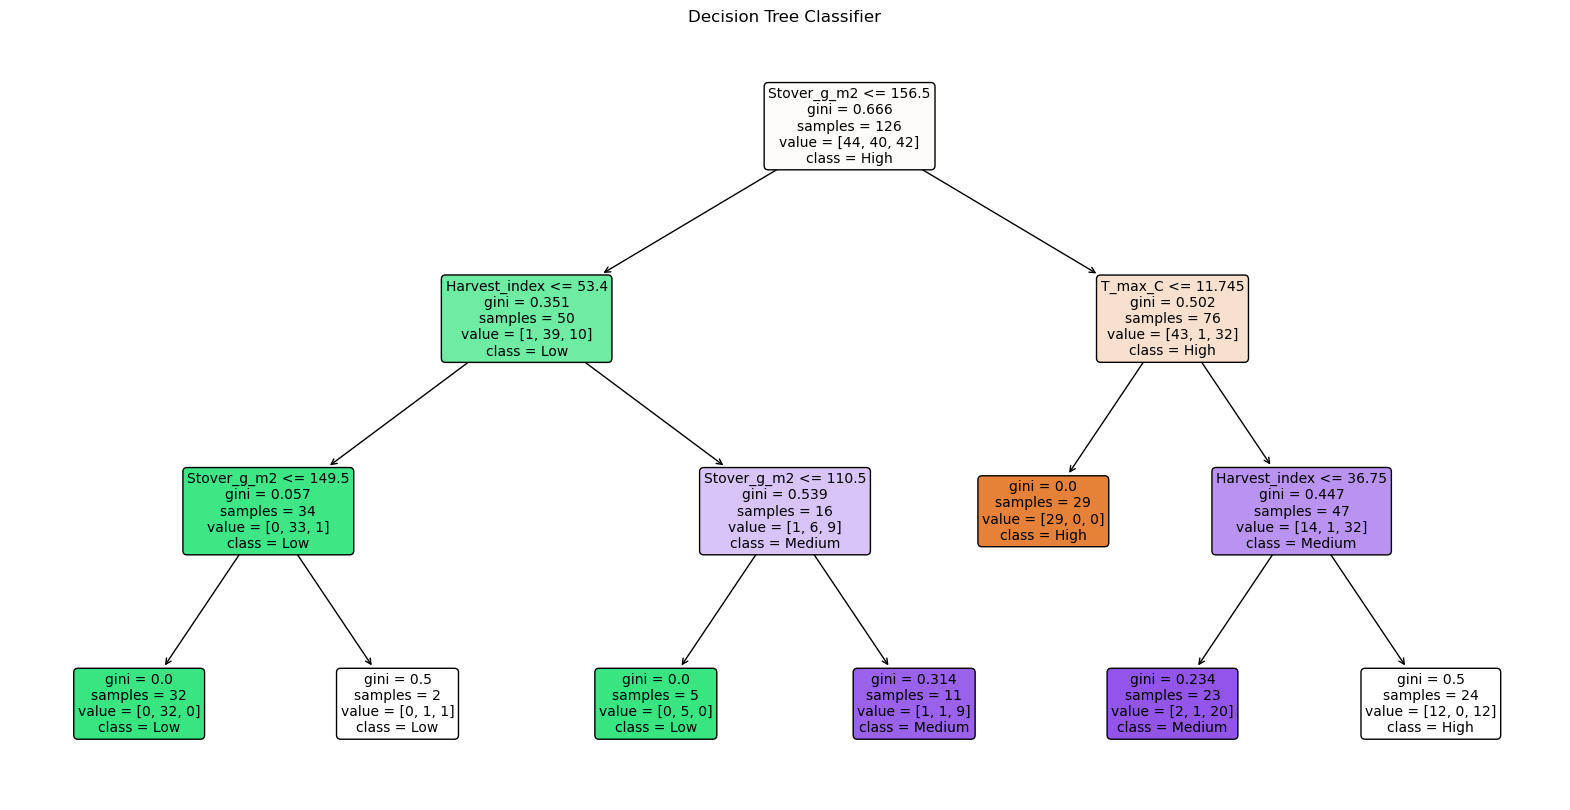

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract the trained decision tree from the pipeline
tree_model = pipeline1.named_steps['classifier']

# Get feature names after one-hot encoding
# This requires fitting the preprocessor separately to get transformed feature names
onehot = pipeline1.named_steps['preprocessing'].named_transformers_['cat']
encoded_cat_features = onehot.get_feature_names_out(categorical_features1)

# Combine with remaining (numerical) feature names
# Remainder='passthrough' means numerical columns are appended as-is
non_cat_features = [col for col in X2.columns if col not in categorical_features1]
feature_names = list(encoded_cat_features) + non_cat_features

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=feature_names, 
          class_names=list(tree_model.classes_),  # Convert NumPy array to list
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Classifier")
plt.show()

In [14]:
#Model creation (Random Forest Regression) and Data Split + Pipeline


# Preprocessing pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features1)
    ],
    remainder='passthrough'  # Keep numerical features as they are
)

# Full pipeline with Random Forest
pipeline1 = Pipeline(steps=[
    ('preprocessing', preprocessor1),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])



In [ ]:
#Results
from sklearn.metrics import mean_squared_error, r2_score

#Heatmap + scatterplot (each feature)
#TSNE?

In [ ]:
#Feature Analysis
#shap feature analysis